# Band structure of honeycomb lattice

In [4]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import math as m

In [15]:
def R(x,y,x_tab):  
    r = np.linalg.norm(np.subtract(x_tab,np.array([x,y])),axis=1)
    r_min = np.min(r)
   
    p = 8.
    d = .5
    y = -p*np.exp(-r_min**2/d**2)

    return y

def honeycomb_supercell(N): 
    a = 1
    b = a/m.sqrt(3)
    
    a1 = a*np.array([0.5*m.sqrt(3), 0.5])
    a2 = a*np.array([0.5*m.sqrt(3), -0.5])
    
    x_tab = b*np.array([[0, 0],[0.5, 0.5*m.sqrt(3)], [1.5, 0.5*m.sqrt(3)],[2, 0]])

    for ii in range(N-1):
        x_shift = np.add(x_tab[0:4], (ii+1)*(a1+a2))
        x_tab = np.vstack((x_tab, x_shift))
        
    return x_tab

def honeycomb_2d(Nx,Ny): 
    a = 1   
    b = a/m.sqrt(3)
    
    a1 = a*np.array([0.5*m.sqrt(3), 0.5])
    a2 = a*np.array([0.5*m.sqrt(3), -0.5])
 
    x_tab = honeycomb_supercell(Nx)
    
    for ii in range(Ny-1):
        x_shift = np.add(x_tab[0:4*Nx], (ii+1)*(a1-a2))
        x_tab = np.vstack((x_tab, x_shift))

    return x_tab 

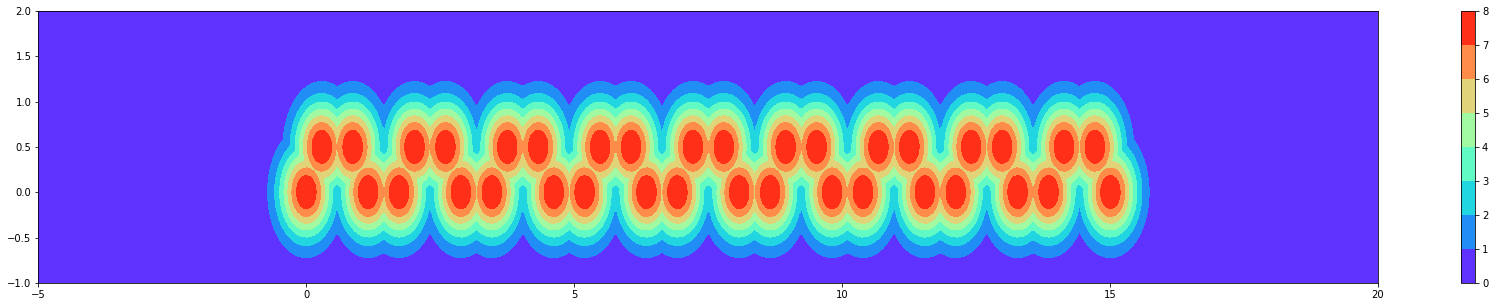

In [16]:
N = 9 # number of period.

x_tab = honeycomb_supercell(N)

nx = 450
ny = 90
x_ = np.linspace(-5,20, nx)
y_ = np.linspace(-1,2, ny) 
X,Y = np.meshgrid(x_, y_,indexing='ij')

Z = np.empty([nx,ny])

for ii in range(nx):
    for jj in range(ny):
        Z[ii,jj] = R(X[ii,jj],Y[jj,jj],x_tab)

plt.figure(figsize=(30,5))
h = plt.contourf(X, Y, -1*Z, cmap="rainbow")
# plt.axis('scaled')
plt.colorbar()
plt.clim(0,8)
plt.show()

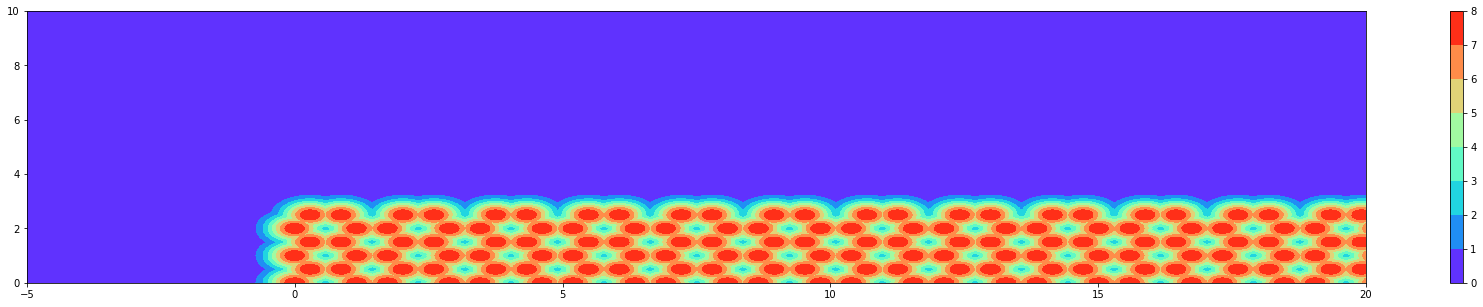

In [18]:
Nx = 18 # number of period.
Ny = 3

x_tab = honeycomb_2d(Nx,Ny)

nx = 450
ny = 150
x_ = np.linspace(-5,20, nx)
y_ = np.linspace(0,10, ny) 
X,Y = np.meshgrid(x_, y_,indexing='ij')

Z = np.empty([nx,ny])

for ii in range(nx):
    for jj in range(ny):
        Z[ii,jj] = R(X[ii,jj],Y[jj,jj],x_tab)

plt.figure(figsize=(30,5))
h = plt.contourf(X, Y, -1*Z, cmap="rainbow")

plt.colorbar()
plt.clim(0,8)
plt.show()